In [9]:
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import random

# fix random seed to get reproduceable results
random.seed(666)

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

iris = datasets.load_iris()

data = np.zeros((len(iris.target), 5))


data[:,0:4] = iris.data[:, 0:4]

for i in range(len(iris.target)):
    data[i][4] = iris.target[i]

np.random.shuffle(data)

X = data[:, 0:4]  # take all 4 features (Sepal Length, Sepal Width, Petal Length and Petal Width)
Y = data[:, 4]

# normalize the dataset
scaler = MinMaxScaler((-0.5, 0.5))
X = scaler.fit_transform(X)

### split onto train and test set (holdout cross validation)
train_ratio = 0.9

len_dataset = len(X)

len_train = int(train_ratio * len_dataset)
len_test = len_dataset - len_train

train_x = np.zeros((len_train,4))
train_y = np.zeros((len_train,3))

test_x = np.zeros((len_test,4))
test_y = np.zeros((len_test,3))




# load train and test input and response rows (you can do train/test splitting in model.fit() as well)
# but doing it here gives you an explicit train and test set of which you can use to verify classification accuracy later

# the categorical target is one-hot encoded
for i in range(len_train):
    train_x[i] = X[i]
    if(Y[i] == 0):
        train_y[i] = np.array([1, 0, 0]) - 0.5
    elif(Y[i] == 1):
        train_y[i] = np.array([0, 1, 0] ) - 0.5
    else:
        train_y[i] = np.array([0, 0, 1] ) - 0.5
        
    
for i in range(len_test):
    test_x[i] = X[i+len_train]
    if(Y[i+len_train] == 0):
        test_y[i] = np.array([1, 0, 0])  - 0.5
    elif(Y[i+len_train] == 1):
        test_y[i] = np.array([0, 1, 0])  - 0.5
    else:
        test_y[i] = np.array([0, 0, 1] ) - 0.5
    
for i in range(5):
    print("Train x: " + str(train_x[i]) + " Train y: " + str(train_y[i]))
    
print()
for i in range(5):
    print("Test x: " + str(test_x[i]) + " Test y: " + str(test_y[i]))

Train x: [-0.11111111 -0.08333333  0.04237288 -0.04166667] Train y: [-0.5  0.5 -0.5]
Train x: [-0.08333333 -0.16666667  0.19491525  0.45833333] Train y: [-0.5 -0.5  0.5]
Train x: [-0.36111111  0.08333333 -0.39830508 -0.45833333] Train y: [ 0.5 -0.5 -0.5]
Train x: [ 0.19444444 -0.08333333  0.26271186  0.33333333] Train y: [-0.5 -0.5  0.5]
Train x: [-0.33333333 -0.04166667 -0.41525424 -0.5       ] Train y: [ 0.5 -0.5 -0.5]

Test x: [ -1.11111111e-01  -1.66666667e-01   9.32203390e-02   1.11022302e-16] Test y: [-0.5  0.5 -0.5]
Test x: [-0.25       -0.20833333 -0.00847458  0.04166667] Test y: [-0.5  0.5 -0.5]
Test x: [-0.30555556  0.125      -0.44915254 -0.41666667] Test y: [ 0.5 -0.5 -0.5]
Test x: [-0.47222222  0.         -0.44915254 -0.45833333] Test y: [ 0.5 -0.5 -0.5]
Test x: [ 0.44444444 -0.08333333  0.36440678  0.41666667] Test y: [-0.5 -0.5  0.5]


Train on 135 samples, validate on 15 samples
Epoch 1/200
  5/135 [>.............................] - ETA: 3s - loss: 0.2802 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.3393 - acc: 0.4889 - val_loss: 0.2304 - val_acc: 0.6667


Epoch 2/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2090 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.3091 - acc: 0.4815 - val_loss: 0.2095 - val_acc: 0.6667


Epoch 3/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2087 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.2839 - acc: 0.4815 - val_loss: 0.1942 - val_acc: 0.6667


Epoch 4/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2218 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.2626 - acc: 0.4741 - val_loss: 0.1831 - val_acc: 0.6667


Epoch 5/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2259 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.2446 - acc: 0.4815 - val_loss: 0.1747 - val_acc: 0.6667


Epoch 6/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2922 - acc: 0.2000

135/135 [==============================] - 0s - loss: 0.2296 - acc: 0.4741 - val_loss: 0.1682 - val_acc: 0.6667


Epoch 7/200
  5/135 [>.............................] - ETA: 0s - loss: 0.3036 - acc: 0.2000

135/135 [==============================] - 0s - loss: 0.2166 - acc: 0.4667 - val_loss: 0.1631 - val_acc: 0.6667


Epoch 8/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2279 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.2055 - acc: 0.4889 - val_loss: 0.1593 - val_acc: 0.6667


Epoch 9/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1277 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.1958 - acc: 0.4741 - val_loss: 0.1561 - val_acc: 0.6667


Epoch 10/200


  5/135 [>.............................] - ETA: 0s - loss: 0.1839 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.1876 - acc: 0.4667 - val_loss: 0.1532 - val_acc: 0.6667


Epoch 11/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2430 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.1801 - acc: 0.5037 - val_loss: 0.1509 - val_acc: 0.6667


Epoch 12/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1457 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.1735 - acc: 0.4815 - val_loss: 0.1486 - val_acc: 0.6667

Epoch 13/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2348 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.1678 - acc: 0.5556 - val_loss: 0.1466 - val_acc: 0.6667


Epoch 14/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2116 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.1624 - acc: 0.5778 - val_loss: 0.1447 - val_acc: 0.7333


Epoch 15/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0963 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.1577 - acc: 0.6222 - val_loss: 0.1428 - val_acc: 0.7333


Epoch 16/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1228 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1533 - acc: 0.6815 - val_loss: 0.1410 - val_acc: 0.7333

Epoch 17/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0642 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1491 - acc: 0.7407 - val_loss: 0.1392 - val_acc: 0.8000


Epoch 18/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0961 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1454 - acc: 0.7630 - val_loss: 0.1376 - val_acc: 0.8000


Epoch 19/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2360 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.1419 - acc: 0.7556 - val_loss: 0.1359 - val_acc: 0.8000


Epoch 20/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1779 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.1388 - acc: 0.7852 - val_loss: 0.1344 - val_acc: 0.8000


Epoch 21/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1096 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.1357 - acc: 0.7704 - val_loss: 0.1327 - val_acc: 0.8000


Epoch 22/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1361 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.1328 - acc: 0.7852 - val_loss: 0.1312 - val_acc: 0.8000


Epoch 23/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1432 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1302 - acc: 0.7778 - val_loss: 0.1297 - val_acc: 0.8000


Epoch 24/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2085 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.1278 - acc: 0.7926 - val_loss: 0.1283 - val_acc: 0.8000

Epoch 25/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0763 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1253 - acc: 0.7926 - val_loss: 0.1268 - val_acc: 0.8000

Epoch 26/200

  5/135 [>.............................] - ETA: 0s - loss: 0.1293 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.1232 - acc: 0.8000 - val_loss: 0.1253 - val_acc: 0.8000


Epoch 27/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1108 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1213 - acc: 0.8000 - val_loss: 0.1240 - val_acc: 0.8000


Epoch 28/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0827 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1192 - acc: 0.7926 - val_loss: 0.1227 - val_acc: 0.8000


Epoch 29/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1178 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.1175 - acc: 0.8000 - val_loss: 0.1214 - val_acc: 0.8000


Epoch 30/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0533 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1158 - acc: 0.8222 - val_loss: 0.1202 - val_acc: 0.8000


Epoch 31/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1140 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1141 - acc: 0.8148 - val_loss: 0.1193 - val_acc: 0.8000


Epoch 32/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0676 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1126 - acc: 0.8148 - val_loss: 0.1181 - val_acc: 0.8000


Epoch 33/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1234 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.1114 - acc: 0.8296 - val_loss: 0.1172 - val_acc: 0.8000


Epoch 34/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1161 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1099 - acc: 0.8296 - val_loss: 0.1163 - val_acc: 0.8000


Epoch 35/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0678 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1088 - acc: 0.8222 - val_loss: 0.1154 - val_acc: 0.8000


Epoch 36/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1333 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.1075 - acc: 0.8296 - val_loss: 0.1145 - val_acc: 0.8000


Epoch 37/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1629 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1066 - acc: 0.8296 - val_loss: 0.1137 - val_acc: 0.8000


Epoch 38/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1268 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.1055 - acc: 0.8296 - val_loss: 0.1129 - val_acc: 0.8000


Epoch 39/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1454 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.1046 - acc: 0.8370 - val_loss: 0.1123 - val_acc: 0.8000


Epoch 40/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0775 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1038 - acc: 0.8222 - val_loss: 0.1114 - val_acc: 0.8000


Epoch 41/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1511 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.1030 - acc: 0.8370 - val_loss: 0.1106 - val_acc: 0.8000


Epoch 42/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0720 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1021 - acc: 0.8444 - val_loss: 0.1101 - val_acc: 0.8000


Epoch 43/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0609 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.1015 - acc: 0.8370 - val_loss: 0.1093 - val_acc: 0.8000


Epoch 44/200
  5/135 [>.............................]

 - ETA: 0s - loss: 0.0743 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1008 - acc: 0.8370 - val_loss: 0.1086 - val_acc: 0.8667


Epoch 45/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0639 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1002 - acc: 0.8444 - val_loss: 0.1079 - val_acc: 0.8667


Epoch 46/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0677 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0997 - acc: 0.8444 - val_loss: 0.1073 - val_acc: 0.8667


Epoch 47/200


  5/135 [>.............................] - ETA: 0s - loss: 0.0740 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0990 - acc: 0.8444 - val_loss: 0.1068 - val_acc: 0.8667


Epoch 48/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0670 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0986 - acc: 0.8444 - val_loss: 0.1062 - val_acc: 0.8667


Epoch 49/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0987 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0982 - acc: 0.8444 - val_loss: 0.1058 - val_acc: 0.8667


Epoch 50/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1250 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0977 - acc: 0.8519 - val_loss: 0.1054 - val_acc: 0.8667


Epoch 51/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1058 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0973 - acc: 0.8444 - val_loss: 0.1049 - val_acc: 0.8667


Epoch 52/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0631 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0968 - acc: 0.8444 - val_loss: 0.1042 - val_acc: 0.8667


Epoch 53/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0948 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0964 - acc: 0.8519 - val_loss: 0.1038 - val_acc: 0.8667


Epoch 54/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1527 - acc: 0.8000

135/135 [==============================]

 - 0s - loss: 0.0964 - acc: 0.8593 - val_loss: 0.1035 - val_acc: 0.8667


Epoch 55/200


  5/135 [>.............................] - ETA: 0s - loss: 0.1036 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0959 - acc: 0.8444 - val_loss: 0.1030 - val_acc: 0.8667


Epoch 56/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1258 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0956 - acc: 0.8519 - val_loss: 0.1025 - val_acc: 0.8667


Epoch 57/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0661 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0953 - acc: 0.8444 - val_loss: 0.1019 - val_acc: 0.8667


Epoch 58/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0697 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0950 - acc: 0.8593 - val_loss: 0.1016 - val_acc: 0.8667


Epoch 59/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0745 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0948 - acc: 0.8593 - val_loss: 0.1012 - val_acc: 0.8667


Epoch 60/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0467 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0945 - acc: 0.8593 - val_loss: 0.1008 - val_acc: 0.8667


Epoch 61/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0934 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0942 - acc: 0.8593 - val_loss: 0.1005 - val_acc: 0.8667


Epoch 62/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0769 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0940 - acc: 0.8593 - val_loss: 0.1000 - val_acc: 0.8667


Epoch 63/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0526 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0937 - acc: 0.8593 - val_loss: 0.0997 - val_acc: 0.8667


Epoch 64/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0672 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0936 - acc: 0.8593 - val_loss: 0.0991 - val_acc: 0.8667


Epoch 65/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1169 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0934 - acc: 0.8593 - val_loss: 0.0988 - val_acc: 0.8667


Epoch 66/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0359 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0933 - acc: 0.8667 - val_loss: 0.0985 - val_acc: 0.8667


Epoch 67/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0573 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0931 - acc: 0.8667 - val_loss: 0.0983 - val_acc: 0.8667


Epoch 68/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0596 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0929 - acc: 0.8667 - val_loss: 0.0980 - val_acc: 0.8667


Epoch 69/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1274 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0927 - acc: 0.8593 - val_loss: 0.0976 - val_acc: 0.8667


Epoch 70/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0785 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0925 - acc: 0.8593 - val_loss: 0.0972 - val_acc: 0.8667


Epoch 71/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0774 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0924 - acc: 0.8667 - val_loss: 0.0970 - val_acc: 0.8667


Epoch 72/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0912 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0923 - acc: 0.8667 - val_loss: 0.0969 - val_acc: 0.8667


Epoch 73/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0883 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0920 - acc: 0.8593 - val_loss: 0.0965 - val_acc: 0.8667


Epoch 74/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0683 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0920 - acc: 0.8593 - val_loss: 0.0962 - val_acc: 0.8667


Epoch 75/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0687 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0918 - acc: 0.8667 - val_loss: 0.0959 - val_acc: 0.8667


Epoch 76/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0733 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0917 - acc: 0.8667 - val_loss: 0.0958 - val_acc: 0.8667


Epoch 77/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0881 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0915 - acc: 0.8667 - val_loss: 0.0956 - val_acc: 0.8667


Epoch 78/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0795 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0914 - acc: 0.8593 - val_loss: 0.0952 - val_acc: 0.8667


Epoch 79/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0401 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0913 - acc: 0.8667 - val_loss: 0.0949 - val_acc: 0.8667


Epoch 80/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0886 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0912 - acc: 0.8667 - val_loss: 0.0945 - val_acc: 0.8667


Epoch 81/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0975 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0911 - acc: 0.8667 - val_loss: 0.0942 - val_acc: 0.8667


Epoch 82/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0652 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0910 - acc: 0.8741 - val_loss: 0.0940 - val_acc: 0.8667


Epoch 83/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0611 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0909 - acc: 0.8667 - val_loss: 0.0938 - val_acc: 0.8667


Epoch 84/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1355 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0908 - acc: 0.8741 - val_loss: 0.0936 - val_acc: 0.8667


Epoch 85/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0948 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0907 - acc: 0.8667 - val_loss: 0.0933 - val_acc: 0.8667


Epoch 86/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0437 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0906 - acc: 0.8667 - val_loss: 0.0930 - val_acc: 0.8667


Epoch 87/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0680 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0904 - acc: 0.8667 - val_loss: 0.0927 - val_acc: 0.8667


Epoch 88/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1276 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0903 - acc: 0.8667 - val_loss: 0.0926 - val_acc: 0.8667


Epoch 89/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1074 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0903 - acc: 0.8667 - val_loss: 0.0923 - val_acc: 0.8667


Epoch 90/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0352 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0902 - acc: 0.8741 - val_loss: 0.0921 - val_acc: 0.8667


Epoch 91/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1158 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0900 - acc: 0.8741 - val_loss: 0.0918 - val_acc: 0.8667


Epoch 92/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0832 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0900 - acc: 0.8667 - val_loss: 0.0914 - val_acc: 0.8667

Epoch 93/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0813 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0899 - acc: 0.8815 - val_loss: 0.0913 - val_acc: 0.8667


Epoch 94/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0833 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0898 - acc: 0.8741 - val_loss: 0.0911 - val_acc: 0.8667


Epoch 95/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0711 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0897 - acc: 0.8741 - val_loss: 0.0909 - val_acc: 0.8667


Epoch 96/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0605 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0897 - acc: 0.8741 - val_loss: 0.0907 - val_acc: 0.8667

Epoch 97/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0432 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0896 - acc: 0.8741 - val_loss: 0.0905 - val_acc: 0.8667


Epoch 98/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0553 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0895 - acc: 0.8741 - val_loss: 0.0902 - val_acc: 0.8667


Epoch 99/200
  5/135 [>.............................]

 - ETA: 0s - loss: 0.0870 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0895 - acc: 0.8667 - val_loss: 0.0901 - val_acc: 0.8667


Epoch 100/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0581 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0894 - acc: 0.8593 - val_loss: 0.0897 - val_acc: 0.8667


Epoch 101/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1163 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0893 - acc: 0.8741 - val_loss: 0.0899 - val_acc: 0.8667


Epoch 102/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0829 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0893 - acc: 0.8741 - val_loss: 0.0896 - val_acc: 0.8667


Epoch 103/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0456 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0892 - acc: 0.8741 - val_loss: 0.0892 - val_acc: 0.8667


Epoch 104/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0810 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0891 - acc: 0.8815 - val_loss: 0.0890 - val_acc: 0.8667


Epoch 105/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1121 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0889 - acc: 0.8741 - val_loss: 0.0887 - val_acc: 0.8667


Epoch 106/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0836 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0889 - acc: 0.8741 - val_loss: 0.0886 - val_acc: 0.8667


Epoch 107/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1150 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0889 - acc: 0.8741 - val_loss: 0.0886 - val_acc: 0.8667


Epoch 108/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0965 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0888 - acc: 0.8667 - val_loss: 0.0884 - val_acc: 0.8667


Epoch 109/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0540 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0887 - acc: 0.8667 - val_loss: 0.0882 - val_acc: 0.8667


Epoch 110/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1286 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0886 - acc: 0.8741 - val_loss: 0.0880 - val_acc: 0.8667


Epoch 111/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1041 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0886 - acc: 0.8815 - val_loss: 0.0878 - val_acc: 0.8667


Epoch 112/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0482 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0884 - acc: 0.8741 - val_loss: 0.0876 - val_acc: 0.8667


Epoch 113/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0570 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0884 - acc: 0.8667 - val_loss: 0.0873 - val_acc: 0.8667


Epoch 114/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0903 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0884 - acc: 0.8667 - val_loss: 0.0871 - val_acc: 0.8667


Epoch 115/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0731 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0883 - acc: 0.8741 - val_loss: 0.0870 - val_acc: 0.8667


Epoch 116/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1068 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0882 - acc: 0.8741 - val_loss: 0.0869 - val_acc: 0.8667


Epoch 117/200

  5/135 [>.............................] - ETA: 0s - loss: 0.0824 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0882 - acc: 0.8741 - val_loss: 0.0867 - val_acc: 0.8667


Epoch 118/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0813 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0881 - acc: 0.8741 - val_loss: 0.0866 - val_acc: 0.8667


Epoch 119/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0743 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0881 - acc: 0.8741 - val_loss: 0.0863 - val_acc: 0.8667


Epoch 120/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1113 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0880 - acc: 0.8741 - val_loss: 0.0862 - val_acc: 0.8667


Epoch 121/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1294 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0879 - acc: 0.8741 - val_loss: 0.0860 - val_acc: 0.8667


Epoch 122/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0798 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0880 - acc: 0.8741 - val_loss: 0.0857 - val_acc: 0.8667


Epoch 123/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0625 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0879 - acc: 0.8741 - val_loss: 0.0856 - val_acc: 0.8667


Epoch 124/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1089 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0877 - acc: 0.8741 - val_loss: 0.0856 - val_acc: 0.8667

Epoch 125/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0588 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0878 - acc: 0.8741 - val_loss: 0.0855 - val_acc: 0.8667


Epoch 126/200


  5/135 [>.............................] - ETA: 0s - loss: 0.1756 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0876 - acc: 0.8741 - val_loss: 0.0854 - val_acc: 0.8667


Epoch 127/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1020 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0877 - acc: 0.8741 - val_loss: 0.0853 - val_acc: 0.8667


Epoch 128/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0645 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0875 - acc: 0.8741 - val_loss: 0.0851 - val_acc: 0.8667


Epoch 129/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1179 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0875 - acc: 0.8667 - val_loss: 0.0849 - val_acc: 0.8667


Epoch 130/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0676 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0874 - acc: 0.8741 - val_loss: 0.0847 - val_acc: 0.8667


Epoch 131/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0843 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0873 - acc: 0.8741 - val_loss: 0.0845 - val_acc: 0.8667


Epoch 132/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0971 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0873 - acc: 0.8741 - val_loss: 0.0844 - val_acc: 0.8667


Epoch 133/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0770 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0873 - acc: 0.8741 - val_loss: 0.0843 - val_acc: 0.8667


Epoch 134/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1696 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0871 - acc: 0.8741 - val_loss: 0.0842 - val_acc: 0.8667


Epoch 135/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0648 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0871 - acc: 0.8741 - val_loss: 0.0840 - val_acc: 0.8667


Epoch 136/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0916 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0871 - acc: 0.8741 - val_loss: 0.0838 - val_acc: 0.8667


Epoch 137/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1112 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0870 - acc: 0.8741 - val_loss: 0.0837 - val_acc: 0.8667


Epoch 138/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0633 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0870 - acc: 0.8815 - val_loss: 0.0834 - val_acc: 0.8667


Epoch 139/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1021 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0870 - acc: 0.8741 - val_loss: 0.0832 - val_acc: 0.8667


Epoch 140/200


  5/135 [>.............................] - ETA: 0s - loss: 0.0623 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0869 - acc: 0.8741 - val_loss: 0.0832 - val_acc: 0.8667

Epoch 141/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0390 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0867 - acc: 0.8741 - val_loss: 0.0830 - val_acc: 0.8667


Epoch 142/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1487 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0868 - acc: 0.8667 - val_loss: 0.0832 - val_acc: 0.8667


Epoch 143/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0972 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0868 - acc: 0.8741 - val_loss: 0.0831 - val_acc: 0.8667


Epoch 144/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0423 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0866 - acc: 0.8741 - val_loss: 0.0830 - val_acc: 0.8667


Epoch 145/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0724 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0866 - acc: 0.8667 - val_loss: 0.0830 - val_acc: 0.8667


Epoch 146/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0829 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0866 - acc: 0.8667 - val_loss: 0.0829 - val_acc: 0.8667


Epoch 147/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0903 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0865 - acc: 0.8667 - val_loss: 0.0829 - val_acc: 0.8667

Epoch 148/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0897 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0864 - acc: 0.8667 - val_loss: 0.0829 - val_acc: 0.8667


Epoch 149/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1379 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0865 - acc: 0.8741 - val_loss: 0.0827 - val_acc: 0.8667


Epoch 150/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1480 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0863 - acc: 0.8741 - val_loss: 0.0825 - val_acc: 0.8667


Epoch 151/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0848 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0862 - acc: 0.8741 - val_loss: 0.0823 - val_acc: 0.8667


Epoch 152/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1344 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0864 - acc: 0.8741 - val_loss: 0.0822 - val_acc: 0.8667


Epoch 153/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0805 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0863 - acc: 0.8741 - val_loss: 0.0820 - val_acc: 0.8667


Epoch 154/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0692 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0862 - acc: 0.8741 - val_loss: 0.0819 - val_acc: 0.8667


Epoch 155/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0651 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0860 - acc: 0.8741 - val_loss: 0.0818 - val_acc: 0.8667


Epoch 156/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0753 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0860 - acc: 0.8741 - val_loss: 0.0817 - val_acc: 0.8667


Epoch 157/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0766 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0860 - acc: 0.8741 - val_loss: 0.0815 - val_acc: 0.8667


Epoch 158/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0678 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0859 - acc: 0.8667 - val_loss: 0.0816 - val_acc: 0.8667


Epoch 159/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0399 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0858 - acc: 0.8741 - val_loss: 0.0813 - val_acc: 0.8667


Epoch 160/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0516 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0858 - acc: 0.8741 - val_loss: 0.0811 - val_acc: 0.8667


Epoch 161/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1387 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0858 - acc: 0.8741 - val_loss: 0.0809 - val_acc: 0.8667

Epoch 162/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1077 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0858 - acc: 0.8741 - val_loss: 0.0806 - val_acc: 0.8667


Epoch 163/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0527 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0856 - acc: 0.8667 - val_loss: 0.0806 - val_acc: 0.8667


Epoch 164/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0729 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0856 - acc: 0.8667 - val_loss: 0.0807 - val_acc: 0.8667


Epoch 165/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1400 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0856 - acc: 0.8667 - val_loss: 0.0806 - val_acc: 0.8667


Epoch 166/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0935 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0855 - acc: 0.8741 - val_loss: 0.0804 - val_acc: 0.8667


Epoch 167/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0406 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0854 - acc: 0.8741 - val_loss: 0.0802 - val_acc: 0.8667


Epoch 168/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0721 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0856 - acc: 0.8741 - val_loss: 0.0801 - val_acc: 0.8667


Epoch 169/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0432 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0854 - acc: 0.8741 - val_loss: 0.0800 - val_acc: 0.8667


Epoch 170/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0615 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0853 - acc: 0.8741 - val_loss: 0.0799 - val_acc: 0.8667


Epoch 171/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0728 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0853 - acc: 0.8741 - val_loss: 0.0797 - val_acc: 0.8667


Epoch 172/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1841 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0853 - acc: 0.8667 - val_loss: 0.0796 - val_acc: 0.8667


Epoch 173/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0763 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0852 - acc: 0.8667 - val_loss: 0.0795 - val_acc: 0.8667


Epoch 174/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0551 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0852 - acc: 0.8667 - val_loss: 0.0795 - val_acc: 0.8667


Epoch 175/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0458 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0851 - acc: 0.8741 - val_loss: 0.0795 - val_acc: 0.8667


Epoch 176/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0893 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0850 - acc: 0.8741 - val_loss: 0.0796 - val_acc: 0.8667


Epoch 177/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0978 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0849 - acc: 0.8741 - val_loss: 0.0795 - val_acc: 0.8667


Epoch 178/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0701 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0849 - acc: 0.8741 - val_loss: 0.0792 - val_acc: 0.8667


Epoch 179/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0693 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0848 - acc: 0.8741 - val_loss: 0.0790 - val_acc: 0.8667


Epoch 180/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1042 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0848 - acc: 0.8741 - val_loss: 0.0790 - val_acc: 0.8667


Epoch 181/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0965 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0849 - acc: 0.8741 - val_loss: 0.0789 - val_acc: 0.8667


Epoch 182/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0391 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0846 - acc: 0.8815 - val_loss: 0.0789 - val_acc: 0.8667


Epoch 183/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1109 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0846 - acc: 0.8815 - val_loss: 0.0788 - val_acc: 0.8667


Epoch 184/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0972 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0845 - acc: 0.8741 - val_loss: 0.0788 - val_acc: 0.8667


Epoch 185/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0665 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0845 - acc: 0.8815 - val_loss: 0.0786 - val_acc: 0.8667


Epoch 186/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1168 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0845 - acc: 0.8741 - val_loss: 0.0784 - val_acc: 0.8667


Epoch 187/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0827 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0844 - acc: 0.8741 - val_loss: 0.0784 - val_acc: 0.8667


Epoch 188/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0613 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0844 - acc: 0.8667 - val_loss: 0.0784 - val_acc: 0.8667


Epoch 189/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0623 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0843 - acc: 0.8741 - val_loss: 0.0782 - val_acc: 0.8667


Epoch 190/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0427 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0843 - acc: 0.8741 - val_loss: 0.0780 - val_acc: 0.8667


Epoch 191/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0510 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0842 - acc: 0.8667 - val_loss: 0.0779 - val_acc: 0.8667


Epoch 192/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0787 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0843 - acc: 0.8741 - val_loss: 0.0777 - val_acc: 0.8667


Epoch 193/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0623 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0842 - acc: 0.8741 - val_loss: 0.0776 - val_acc: 0.8667


Epoch 194/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1004 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0841 - acc: 0.8741 - val_loss: 0.0777 - val_acc: 0.8667


Epoch 195/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0641 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0840 - acc: 0.8741 - val_loss: 0.0776 - val_acc: 0.8667


Epoch 196/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0993 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0838 - acc: 0.8741 - val_loss: 0.0773 - val_acc: 0.8667


Epoch 197/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0565 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0838 - acc: 0.8815 - val_loss: 0.0773 - val_acc: 0.8667


Epoch 198/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0619 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0839 - acc: 0.8815 - val_loss: 0.0772 - val_acc: 0.8667


Epoch 199/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1359 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0837 - acc: 0.8889 - val_loss: 0.0772 - val_acc: 0.8667


Epoch 200/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0801 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0838 - acc: 0.8815 - val_loss: 0.0772 - val_acc: 0.8667

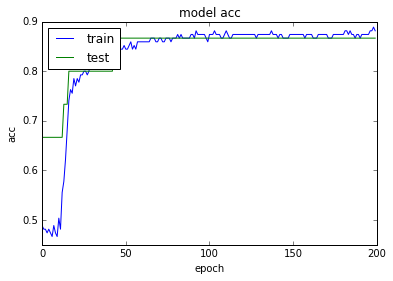

In [10]:
### now build our neural net and train it

model = Sequential() # Keras sequential neural net model
model.add(Dense(5, activation = 'tanh', input_dim = 4)) # build our first layer, 5 neurons, tanh (bipolar sigmoid) activation, input_dim = 2
model.add(Dense(3, activation = 'tanh')) # 3 outputs

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train_x,train_y, batch_size=5, epochs = 200, validation_data=(test_x, test_y))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
### now test  the neural net for classification accuracy

for i in range(len_test):
    pred = model.predict(np.reshape(test_x[i], (1,4)))
    print("Actual: " + str(test_y[i]) + " Prediction: " + str(pred) 
          + " Classified correctly? " + str(np.argmax(test_y[i]) == np.argmax(pred[0])) )

Actual: [-0.5  0.5 -0.5] Prediction: [[-0.29410523  0.15805843 -0.37484434]] Classified correctly? True
Actual: [-0.5  0.5 -0.5] Prediction: [[-0.38019481 -0.07167799 -0.04700476]] Classified correctly? False
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.35141543 -0.29899397 -0.68008459]] Classified correctly? True
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.58342612 -0.46214318 -0.6353938 ]] Classified correctly? True
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.48618132 -0.3072232  -0.67319286]] Classified correctly? True
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.46648976 -0.30200931 -0.6636712 ]] Classified correctly? True
Actual: [-0.5 -0.5  0.5] Prediction: [[-0.5966782   0.02206916 -0.03994922]] Classified correctly? False
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.42650661 -0.1838534  -0.73007679]] Classified correctly? True
Actual: [-0.5  0.5 -0.5] Prediction: [[ -1.65650383e-01   3.35171761e-04  -3.59844565e-01]] Classified correctly? True
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.49461